In [1]:
# 아래 코드를 기반으로 자유롭게 수정.
# reward_matrix 형태 수정 금지.
# 강화학습 관련 패키지, 라이브러리, 함수 사용 금지 (예. OpenAI Gym)

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수

def simple_convert_into_pi_from_theta(theta):
    '''단순 비율 계산'''
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환
    return pi

In [2]:
# ε-greedy 알고리즘 구현

class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return

    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self, state, Q, epsilon, pi_0):
        direction = np.arange(N)
        # 행동을 결정
        if np.random.rand() < epsilon: # 확률 e로 무작위 행동을 선택함
            action = np.random.choice(direction, p=pi_0[state, :]) #np.random.randint(3, size=(1))
        else:
            action = direction[np.nanargmax(Q[state, :])] #direction[np.argmax(Q[:,0])]
            #print(action)
        return action
    
    def get_s_next(self, state, action):
        direction = np.arange(N)
        next_direction = direction[action]  # 행동 a의 방향
        s_next = next_direction
        
        return s_next

In [3]:
# Q러닝 알고리즘으로 행동가치 함수 Q를 수정
def Q_learning(state, action, s_next, reward, Reward_array, Q, eta, gamma=1): 
    
    if Reward_array[s_next] is 1: #목표 지점
        #Q[state, 0] = Q[state, 0] + eta * (1 - Q[state, 0])
        Q[state, action] = Q[state, action] + eta * (reward - Q[state, action]) + 0.1
    else:
        #Q[state, 0] = Q[state, 0] + eta * (0 + gamma + np.max(Q[s_next, 0]) - Q[state, 0])
        Q[state, action] = Q[state, action] + eta * (reward + gamma*np.nanmax(Q[s_next,:]) - Q[state, action]) - 0.1
    return Q

In [4]:
def test_algorithm(algo, reward_matrix, epsilon, eta):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    statelist = np.arange(N) # 초기상태 리스트
    
    for sim in range(num_sims):
        print("person:", sim)
        theta_0 = np.ones((N,N))
        pi_0 = simple_convert_into_pi_from_theta(theta_0)
        [a, b] = theta_0.shape  # # 열과 행의 갯수를 변수 a, b에 저장
        Q = np.random.rand(a, b) * theta_0 * 0.1
        
        state = statelist[0] # 초기상태 지정
        for t in range(T):
            Reward_array = reward_matrix[:,t,sim]
            epsilon = epsilon - (1e-03/6)
            chosen_ad = algo.select_ad(state, Q, epsilon, pi_0) #액션
            reward = reward_matrix[chosen_ad,t,sim] #보상 스칼라
            s_next = algo.get_s_next(state, chosen_ad) # 다음 상태 정보
            Q = Q_learning(state, chosen_ad, s_next, reward, Reward_array, Q, eta) #Q러닝
            state = s_next # 상태 업데이트
            
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward

    return cumulative_rewards

person: 0
person: 1
person: 2
person: 3
person: 4
person: 5
person: 6
person: 7
person: 8
person: 9
[683. 686. 684. 674. 687. 683. 680. 653. 690. 692.]


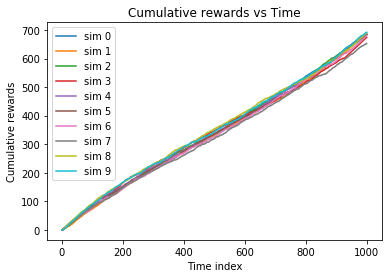

In [5]:
# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
## 파라미터 수정
N = 3
T = 1000
num_sims = 10
epsilon = 0.5
eta = 0.1

reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix, epsilon, eta)
print(results[:,T-1])


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

[610. 599. 601. 574. 579. 566. 578. 582. 557. 587.]


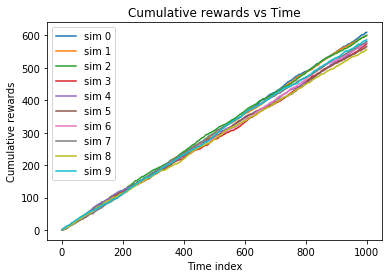

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return
    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self):
        return random.randrange(N)

def test_algorithm(algo, reward_matrix):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    for sim in range(num_sims):
        for t in range(T):
            chosen_ad = algo.select_ad()
            reward = reward_matrix[chosen_ad,t,sim]
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward
    #print(cumulative_rewards)
    return cumulative_rewards

# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
N = 3
T = 1000
num_sims = 10
reward_matrix = np.zeros((N,T,num_sims))
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]
# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix)
print(results[:,T-1])
#print(results)
# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))
plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

In [7]:
for t in range(100):
    epsilon = 1. / ((t // 100) + 1) + epsilon
    #print(epsilon)
    #print(t // 100)
print(0//10)

0


In [8]:
reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
print(reward_matrix.shape)
a = reward_matrix[:,0,0]
print(a.shape)
print(a)

(3, 1000, 10)
(3,)
[0. 0. 0.]


In [9]:
theta = np.ones((3,3)) # 초기상태 리스트
print(theta)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
